<a href="https://colab.research.google.com/github/shivam-cse/CS-306-Machine-Learning-Work/blob/main/Lab8/SLP_Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import pandas as pd
import numpy as np
import warnings
import random

In [ ]:
from sklearn import datasets
wine = datasets.load_wine()
print(wine.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [ ]:
X = wine.data
Y = wine.target
# X, Y = shuffle(X, Y)
X = pd.DataFrame(X, columns=wine.feature_names)
print(X)


     alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0      14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1      13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2      13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3      14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4      13.24        2.59  2.87  ...  1.04                          2.93    735.0
..       ...         ...   ...  ...   ...                           ...      ...
173    13.71        5.65  2.45  ...  0.64                          1.74    740.0
174    13.40        3.91  2.48  ...  0.70                          1.56    750.0
175    13.27        4.28  2.26  ...  0.59                          1.56    835.0
176    13.17        2.59  2.37  ...  0.60                          1.62    840.0
177    14.13        4.10  2.74  ...  0.61                          1.60    560.0

[178 rows x 13 columns]


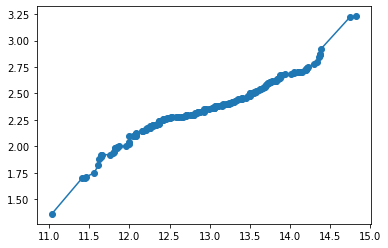

In [ ]:

x1 = X['alcohol']
y1 = X['ash']
x1 = x1.sort_values()
y1 = y1.sort_values()
plt.scatter(x1, y1)
plt.plot(x1, y1)
plt.show()

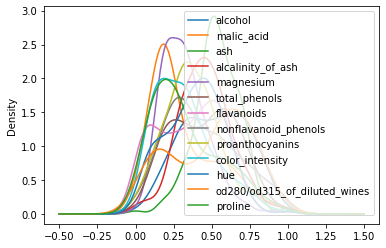

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
dataset_new = minmax.fit_transform(X)
X = pd.DataFrame(dataset_new, columns=wine.feature_names)
X.plot.kde()
X = X.values

# **HelpFul For one hot encoding**
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

In [ ]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(np.reshape(Y, (-1, 1)))
print(onehot)
# temp = encoder.inverse_transform(onehot)
# print(temp)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
train_frac = 60/100  #60%   left ->: 100-60 = 40%
valid_frac = 20/40 #(100/70)*10
test_frac = 20/40 #(100/70)*60
print("total : ", X.shape)
x_train, x_rem, y_train, y_rem = train_test_split(X, onehot, train_size=train_frac)
x_valid, x_test, y_valid,  y_test = train_test_split(x_rem, y_rem,  test_size=test_frac)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_valid.shape, y_valid.shape)

total :  (178, 13)
(106, 13) (106, 3)
(36, 13) (36, 3)
(36, 13) (36, 3)


In [ ]:

def threshold(z):
    # Activation function
    y = np.ones(z.shape[0])
    for i in range(z.shape[0]):
      if(z[i] >= 0.5):
        y[i] = 1
      else:
        y[i] = 0
    return y

def sigmoid(z):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-z))


def slp_predict(weights, X):
  X = add_intercept(X)
  y_predicted = sigmoid(np.dot(X, weights.T))
  # y_predicted_cls = threshold(sigmoid(linear_model))
  y_pred = np.where(y_predicted >= 0.5 , 1, 0)
  return np.array(y_pred)

def model_analysis(x_test, y_test, weight):
  x_test = add_intercept(x_test)
  y_pred = np.ones(y_test.shape[0])
  hypothesis = sigmoid(np.dot(x_test, weight.T))
  for i in range(0, hypothesis.shape[0]):
    if (hypothesis[i] < 0.5):
      y_pred[i] = 0
    if (hypothesis[i]>=0.5):
      y_pred[i] = 1
  test_acc = accuracy_score(y_test, y_pred)*100
  # precision = precision_score(y_test, y_pred)*100
  # recall = recall_score(y_test, y_pred)*100
  # f1 = f1_score(y_test, y_pred)*100
  print("Training Accuracy: ", test_acc)
  # print("Prescission Score:", precision)
  # print("Recall Score : ", recall) 
  # print('F1 Score : ', f1)
  print('Confusion Matrix : \n' + str(confusion_matrix(y_test, y_pred)))
  print("Classification Report for 3-classes: ")
  print(classification_report(y_test, y_pred))
  return test_acc


def cost_mse(weights, X, Y):
  X = add_intercept(X)
  total_samples = X.shape[0]
  jw = 0
  for j in range(total_samples): #index from total samples
          sample_x = X[j]
          sample_y = Y[j]
          y_predicted = sigmoid(np.dot(sample_x, weights.T))
          # print(sample_y, y_predicted)
          jw = jw + (np.sum((sample_y - y_predicted) ** 2))/2
  jw = (jw)/(2*total_samples)
  return jw
  

def accuracy(y_true, y_pred):
    ans = 0
    for i in range(y_true.shape[0]):
      y1 = y_true[i]
      y2 = y_pred[i]
      count = np.sum(y1 == y2)
      if count == 3:
        ans = ans + 1
  
    ans = ans/len(y_true)
    return ans   


def add_intercept(x):
  intercept = np.ones((x.shape[0], 1))
  return np.concatenate((intercept, x), axis=1)

def SLP(X_train, Y_train, epoch, learning_rate):
    X_train = add_intercept(X_train)
    number_of_features = X_train.shape[1]
    number_of_class = Y_train.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # weights = np.ones(shape=(number_of_features)) 
    weights = np.empty(shape=(number_of_class, number_of_features))
    weights.fill(0.1)
    cost_list = list()
    epoch_list = list()
    mse = 0
    # weights = np.array([0.1, 0.1, 0.1])
    total_samples = X_train.shape[0]
    for i in range(epoch + 1): 
        jw = 0   
        for j in range(total_samples): # random index from total samples
          sample_x = X_train[j]
          sample_y = Y_train[j]
         
          y_predicted = sigmoid(np.dot(sample_x, weights.T))
          # print(sample_y, y_predicted)
          jw = jw + (np.sum((sample_y - y_predicted) ** 2))/2
          # print(jw)
          w_grad = ((np.dot(sample_x[:, None], (sample_y - y_predicted)[None, : ]))*y_predicted*(1-y_predicted)).T          
          weights = weights + learning_rate * w_grad
        jw = (jw)/(2*total_samples)
        mse = jw
        if i == 100: # at every 100th iteration record the cost and epoch value
         cost_list.append(jw)
         epoch_list.append(i)
        
    return weights, cost_list, epoch_list, mse




# **Hyperparameter tuning on the validation set.**

In [ ]:
# rho = [0.00001, 0.00001, 0.00007, 0.000008, 0.00009]
alpha = [0.01, 0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 1]
epochs = [100, 100, 100, 100, 100, 100, 100, 100]

validation_accuracy = []
mse_list = []
for a, e in zip(alpha, epochs):
  weights, cost_list, epoch_list, mse = SLP(x_train, y_train, e, a)
  # print(weights)
  print("Alph = ", a, "epoch = ", e)
  y_pred_train = slp_predict(weights, x_train)
  y_pred_valid = slp_predict(weights, x_valid)
  accuracy_train = accuracy_score(y_train, y_pred_train)
  accuracy_valid = accuracy_score(y_valid, y_pred_valid)
  print("Train Accuracy : ", accuracy_train)
  print("Validation Accuracy : ", accuracy_valid)
  validation_accuracy.append(accuracy_valid)
  print(cost_list)
  print(mse)
  mse_list.append(mse)
  print("-"*40)
  # print(cost_list)
  # print(epoch_list)


Alph =  0.01 epoch =  100
Train Accuracy :  0.8679245283018868
Validation Accuracy :  0.9444444444444444
[0.0715942804851221]
0.0715942804851221
----------------------------------------
Alph =  0.1 epoch =  100
Train Accuracy :  0.9716981132075472
Validation Accuracy :  0.9722222222222222
[0.02049077484833996]
0.02049077484833996
----------------------------------------
Alph =  0.3 epoch =  100
Train Accuracy :  1.0
Validation Accuracy :  0.9722222222222222
[0.010823754930777193]
0.010823754930777193
----------------------------------------
Alph =  0.5 epoch =  100
Train Accuracy :  1.0
Validation Accuracy :  0.9722222222222222
[0.00777458252685778]
0.00777458252685778
----------------------------------------
Alph =  0.6 epoch =  100
Train Accuracy :  1.0
Validation Accuracy :  0.9722222222222222
[0.006859060587346297]
0.006859060587346297
----------------------------------------
Alph =  0.7 epoch =  100
Train Accuracy :  1.0
Validation Accuracy :  1.0
[0.006149204179784506]
0.00614920

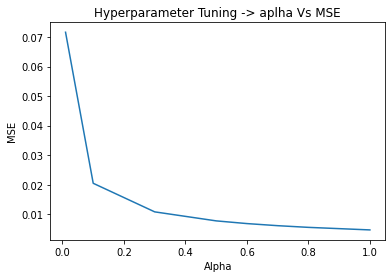

In [ ]:
plt.plot(alpha, mse_list)
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.title("Hyperparameter Tuning -> aplha Vs MSE")
plt.show()

# **Check overfitting issue**

In [ ]:
# rho = [0.00001, 0.00001, 0.00007, 0.000008, 0.00009]
alpha = [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
epochs = [10, 20, 30, 50, 70, 80, 100]

validation_accuracy = []
train_accuracy = []
test_accuracy = []
train_mse = []
validation_mse = []
test_mse = []
for a, e in zip(alpha, epochs):
  weights, cost_list, epoch_list, mse = SLP(x_train, y_train, e, a)
  # print(weights)
  print("Alph = ", a, "epoch = ", e)
  y_pred_train = slp_predict(weights, x_train)
  y_pred_valid = slp_predict(weights, x_valid)
  y_pred_test = slp_predict(weights, x_test)
  accuracy_train = accuracy_score(y_train, y_pred_train)
  accuracy_valid = accuracy_score(y_valid, y_pred_valid)
  accuracy_test = accuracy_score(y_test, y_pred_test)
  print("Train Accuracy : ", accuracy_train)
  print("Validation Accuracy : ", accuracy_valid)
  print("Test Accuracy : ", accuracy_test)
  validation_accuracy.append(accuracy_valid)
  train_accuracy.append(accuracy_train)
  test_accuracy.append(accuracy_test)
  mse_ = cost_mse(weights, x_valid, y_valid)
  mse_t = cost_mse(weights, x_test, y_test)
  train_mse.append(mse)
  validation_mse.append(mse_)
  test_mse.append(mse_t)
  print("-"*50)
  # print(cost_list)
  # print(epoch_list)


NameError: ignored

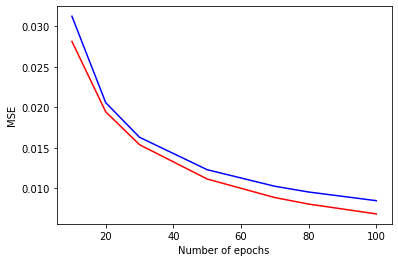

In [ ]:
plt.plot(epochs, validation_mse, color="blue")
plt.plot(epochs, train_mse, color="red")
plt.xlabel("Number of epochs")
plt.ylabel("MSE")
plt.show()


In [ ]:
e = 60
a = 0.6
weights, cost_list, epochs_list, mse = SLP(x_train, y_train, e, a)
# print(weights)
print(mse)
# print(cost_list)
# print(epochs_list)
mse_ = cost_mse(weights, x_train, y_train)
print(mse_)

0.009874354891876689
0.009235394873260647


## **Finally report class-wise precision, recall, accuracy and overall accuracy considering 5-fold cross validation.**

In [ ]:
Y.shape, X.shape

((178,), (178, 13))

In [ ]:
def kfold_cv(X, Y, fs = 5, epoch = 100, alpha = 0.5):
  X, Y = shuffle(X, Y)
  fold_size = fs
  strtfdKFold = StratifiedKFold(n_splits=fold_size)
  kfold = strtfdKFold.split(X, Y)
  scores = []
  e = epoch
  a = alpha
  total_cost = 0
  for k, (train, test) in enumerate(kfold):
    print("-"*20, "KFold - ",k +1,  "-"*20)
    x_ftrain, y_ftrain = X[train], Y[train]
    x_ftest, y_ftest = X[test], Y[test]
    encoder = OneHotEncoder(sparse=False)
    # transform data
    y_ftrain = encoder.fit_transform(np.reshape(y_ftrain, (-1, 1)))
    y_ftest =  encoder.fit_transform(np.reshape(y_ftest, (-1, 1)))
    weights, cost_list, epochs_list, mse = SLP(x_ftrain, y_ftrain, e, a)
    test_mse = cost_mse(weights, x_ftest,  y_ftest)
    print("Test cost[Error] :", test_mse)
    total_cost += test_mse
    y_pred_test = slp_predict(weights, x_ftest)
    y_pred_test_inverse = encoder.inverse_transform(y_pred_test)
    y_actual_test_inverse = encoder.inverse_transform(y_ftest)
    print('Confusion Matrix : \n' + str(confusion_matrix(y_actual_test_inverse, y_pred_test_inverse)))
    # print('Confusion Matrix For Test Data set : \n')
    # cm = confusion_matrix(y_actual_test_inverse, y_pred_test_inverse)
    # plt.figure(figsize = (10,7))
    # # cmap= "Greens_r"
    # # cmap= "OrRd_r"
    # # cmap= "OrRd"
    # sn.heatmap(cm, annot=True,cmap="Greens_r")
    print("Classification Report for 3-classes: ")
    print(classification_report(y_ftest, y_pred_test))
    accuracy_test = accuracy_score(y_ftest, y_pred_test)
    print("Overall Test Accuracy: ", accuracy_test)
  print("-----------------Done Kfold----------------")    
  print("Total Cost [Errors]", total_cost/fold_size)    


In [ ]:
kfold_cv(X, Y, 5, 60, 0.6)

-------------------- KFold -  1 --------------------
Test cost[Error] : 0.011127209276922019
Confusion Matrix : 
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
Classification Report for 3-classes: 
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

   micro avg       1.00      0.97      0.99        36
   macro avg       1.00      0.97      0.99        36
weighted avg       1.00      0.97      0.99        36
 samples avg       0.97      0.97      0.97        36

Overall Test Accuracy:  0.9722222222222222
-------------------- KFold -  2 --------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test cost[Error] : 0.01854266938926128
Confusion Matrix : 
[[12  0  0]
 [ 1 12  1]
 [ 0  0 10]]
Classification Report for 3-classes: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.86      0.92        14
           2       0.91      1.00      0.95        10

   micro avg       0.97      0.94      0.96        36
   macro avg       0.97      0.95      0.96        36
weighted avg       0.97      0.94      0.96        36
 samples avg       0.94      0.94      0.94        36

Overall Test Accuracy:  0.9444444444444444
-------------------- KFold -  3 --------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test cost[Error] : 0.020714993061635663
Confusion Matrix : 
[[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]
Classification Report for 3-classes: 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

   micro avg       0.97      0.97      0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36
 samples avg       0.96      0.97      0.96        36

Overall Test Accuracy:  0.9444444444444444
-------------------- KFold -  4 --------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test cost[Error] : 0.005123874284818558
Confusion Matrix : 
[[12  0  0]
 [ 0 14  0]
 [ 0  0  9]]
Classification Report for 3-classes: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         9

   micro avg       1.00      1.00      1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35
 samples avg       1.00      1.00      1.00        35

Overall Test Accuracy:  1.0
-------------------- KFold -  5 --------------------
Test cost[Error] : 0.01643431433700694
Confusion Matrix : 
[[11  0  0]
 [ 1 14  0]
 [ 0  1  8]]
Classification Report for 3-classes: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.93      0.93        15
           2       1.00      0.89      0.94         

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
